In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
from google.colab import files
uploaded = files.upload()

Saving option_train.csv to option_train.csv


In [3]:
data = pd.read_csv('option_train.csv')
print(data.head())
print(data.shape)

   Unnamed: 0    Value        S     K       tau       r     BS
0           1  348.500  1394.46  1050  0.128767  0.0116  Under
1           2  149.375  1432.25  1400  0.679452  0.0113  Under
2           3  294.500  1478.90  1225  0.443836  0.0112  Under
3           4    3.375  1369.89  1500  0.117808  0.0119   Over
4           5   84.000  1366.42  1350  0.298630  0.0119  Under
(5000, 7)


In [4]:
# Convert 'BS' column to binary values
data['BS'] = data['BS'].replace({'Under': 0, 'Over': 1})

# Create a new dataframe with the modified data
train_data = data.copy()

# Display the first few rows and the shape of the new dataframe
print(train_data.head())
print(train_data.shape)

   Unnamed: 0    Value        S     K       tau       r  BS
0           1  348.500  1394.46  1050  0.128767  0.0116   0
1           2  149.375  1432.25  1400  0.679452  0.0113   0
2           3  294.500  1478.90  1225  0.443836  0.0112   0
3           4    3.375  1369.89  1500  0.117808  0.0119   1
4           5   84.000  1366.42  1350  0.298630  0.0119   0
(5000, 7)


In [5]:
from google.colab import files
uploaded = files.upload()

Saving classification_test_data.csv to classification_test_data.csv


In [6]:
test_data = pd.read_csv('classification_test_data.csv')
print(test_data.head())
print(test_data.shape)

        Value        S     K       r       tau
0  103.740350  1409.28  1325  0.0115  0.126027
1  428.595613  1505.97  1100  0.0110  0.315068
2   48.754323  1409.57  1450  0.0116  0.197260
3  177.678777  1407.81  1250  0.0116  0.101370
4  219.066963  1494.50  1300  0.0110  0.194521
(500, 5)


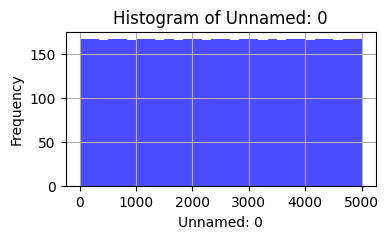

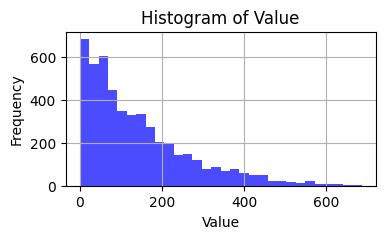

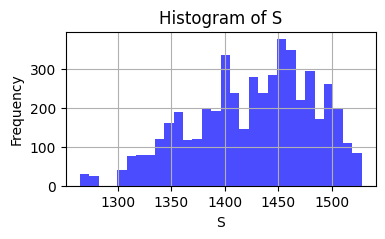

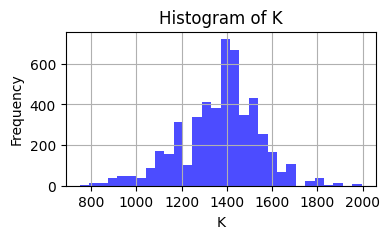

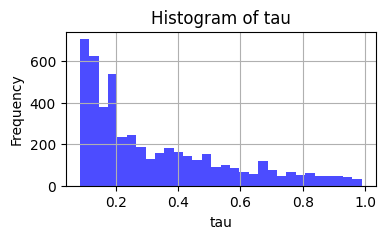

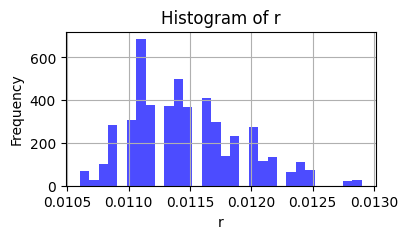

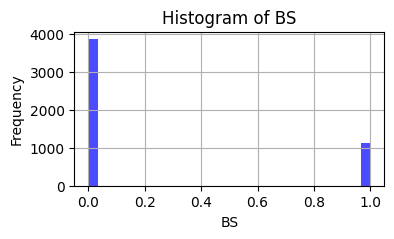

In [7]:
# Plot histograms for each feature
for column in train_data.columns:
    plt.figure(figsize=(4, 2))
    plt.hist(train_data[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

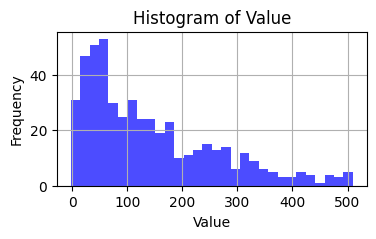

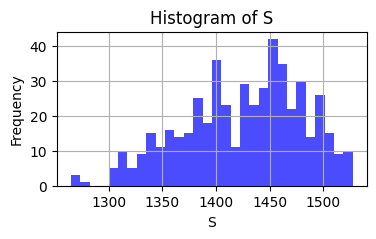

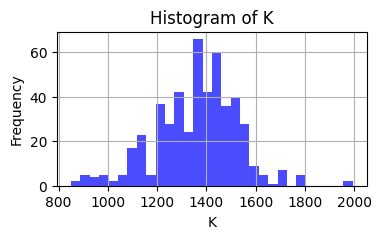

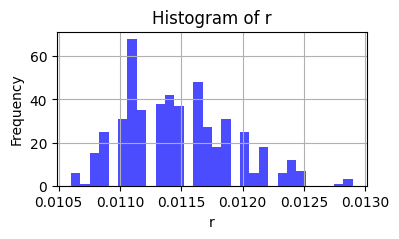

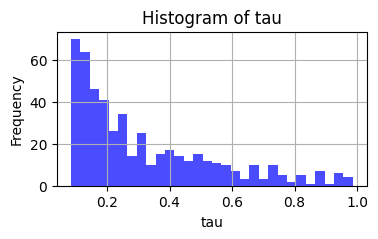

In [8]:
# Plot histograms for each feature
for column in test_data.columns:
    plt.figure(figsize=(4, 2))
    plt.hist(test_data[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

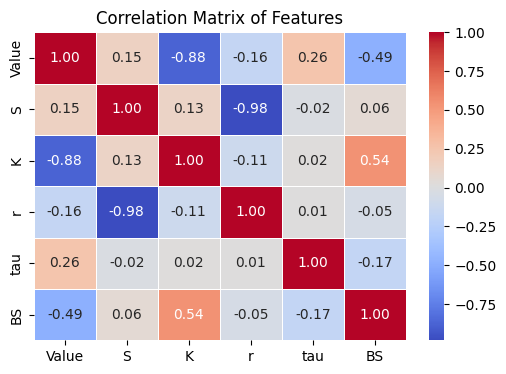

In [9]:
# Calculate the correlation matrix
train_data = train_data[['Value', 'S', 'K', 'r', 'tau', 'BS']]
corr_matrix = train_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [10]:
# Calculate z-scores for each data point
z_scores = np.abs(stats.zscore(train_data))

# Define a threshold for considering a data point as an outlier
threshold = 3

# Find indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers
cleaned_data = train_data[(z_scores < threshold).all(axis=1)]
cleaned_data.shape

(4875, 6)

In [12]:
X = train_data[['Value', 'S', 'K', 'r', 'tau']]
y = train_data[['BS']]
y = np.ravel(y)

scaler = StandardScaler()

# Fit scaler to the data and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
print(X_scaled_df.head())

      Value         S         K         r       tau
0  1.663569 -0.574242 -1.854747  0.295313 -0.860212
1  0.072383  0.100027  0.172337 -0.373826  1.522042
2  1.232061  0.932380 -0.841205 -0.596872  0.502769
3 -1.094288 -1.012632  0.751504  0.964453 -0.907620
4 -0.450022 -1.074546 -0.117247  0.964453 -0.125387


In [13]:
scaler = StandardScaler()

# Fit scaler to the data and transform the features
X_scaled_test = scaler.fit_transform(test_data)

# Convert the scaled features back to a DataFrame
X_scaled_df_test = pd.DataFrame(X_scaled_test, columns=test_data.columns)

# Display the scaled features
print(X_scaled_df_test.head())

      Value         S         K         r       tau
0 -0.318780 -0.294389 -0.211230  0.053544 -0.857011
1  2.407545  1.456776 -1.554175 -1.071334 -0.004301
2 -0.780246 -0.289136  0.534850  0.278520 -0.535700
3  0.301743 -0.321012 -0.658879  0.278520 -0.968234
4  0.649091  1.249041 -0.360446 -1.071334 -0.548058


In [14]:
# Split the data into training and test sets while maintaining class proportions
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, stratify=y, random_state=42)

### KNN Classifier

In [15]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_predict = clf.predict(X_test)  # Use X_test for predictions, not test_data

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_predict)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.914


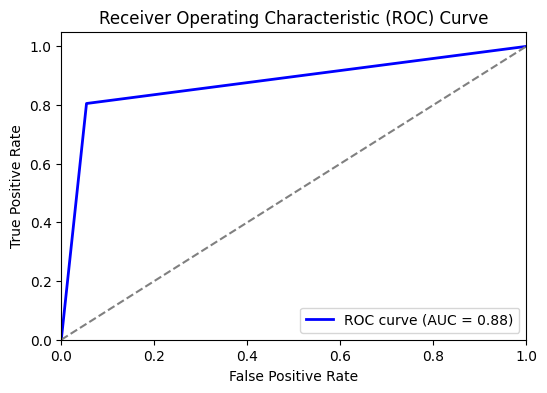

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

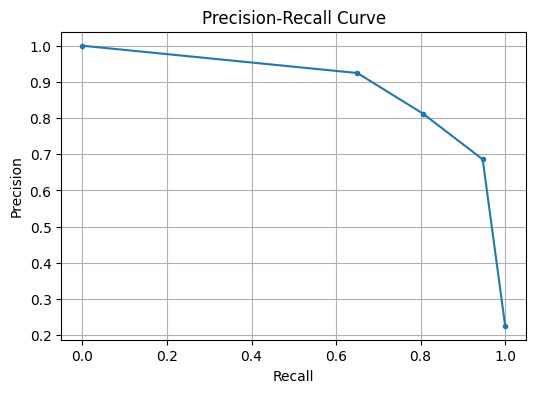

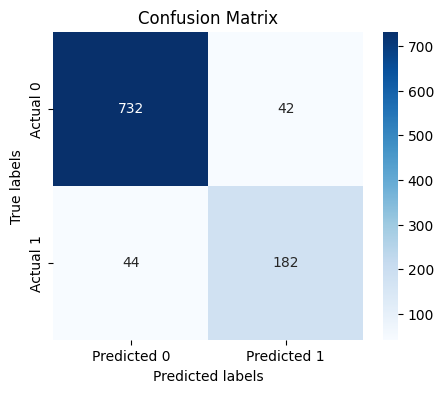

In [17]:
from sklearn.metrics import precision_recall_curve, confusion_matrix

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
clf1 = KNeighborsClassifier(n_neighbors=5).fit(X_scaled_df,y)
y_predict1 = clf1.predict(X_scaled_df_test)
y_predict1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [19]:
# Perform cross-validation
cv_scores = cross_val_score(clf1, X_scaled_df, y, cv=10)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)


Accuracy for each fold: [0.926 0.912 0.908 0.922 0.898 0.92  0.924 0.934 0.928 0.954]
Mean accuracy: 0.9226000000000001
Classification error: 0.07739999999999991


### Logistic Regression

In [20]:
# Fit Logistic Regression model on the training data
logistic_reg = LogisticRegression(solver='newton-cg')
logistic_reg.fit(X_train, y_train)

# Make predictions on the test data
y_predict_lr = logistic_reg.predict(X_test)

# Calculate accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_predict_lr)

# Print the accuracy for Logistic Regression
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.911


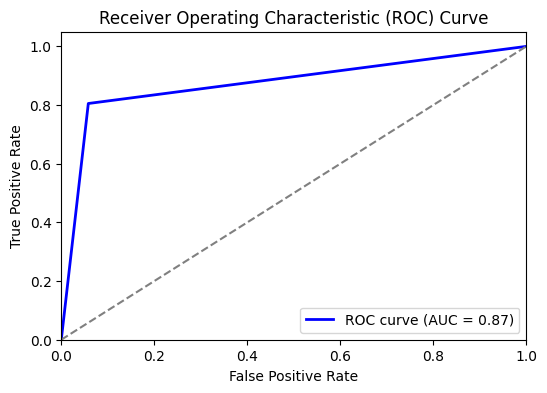

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_predict_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

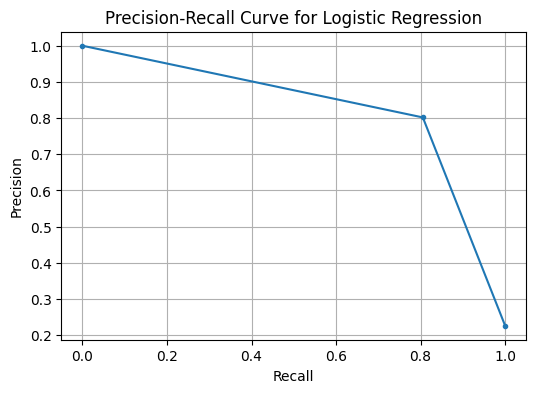

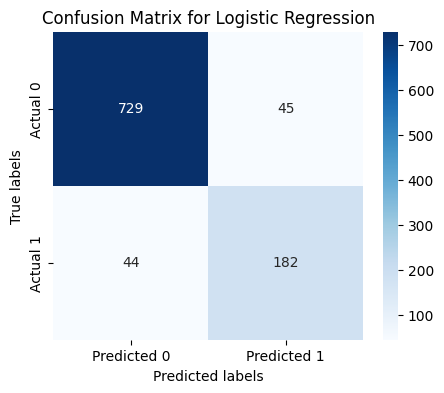

In [22]:
# Calculate precision-recall curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_predict_lr)

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall_lr, precision_lr, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.grid(True)
plt.show()

# Plot confusion matrix
conf_mat_lr = confusion_matrix(y_test, y_predict_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_lr, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [23]:
logistic_reg1 = LogisticRegression(solver='newton-cg').fit(X_scaled_df,y)
y_predict_lr1 = logistic_reg1.predict(X_scaled_df_test)
y_predict_lr1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [24]:
# Perform cross-validation
cv_scores = cross_val_score(logistic_reg1, X_scaled_df, y, cv=10)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.916 0.922 0.912 0.916 0.904 0.926 0.914 0.928 0.926 0.934]
Mean accuracy: 0.9198000000000001
Classification error: 0.08019999999999994


In [25]:
# Create a Logistic Regression classifier with regularization
logistic_reg_reg = LogisticRegression(solver='newton-cg', C=1.5)  # Adjust C as needed

# Fit the Logistic Regression model on the scaled training data
logistic_reg_reg.fit(X_scaled_df, y)

# Make predictions on the scaled test data
y_predict_lr_reg = logistic_reg_reg.predict(X_scaled_df_test)
y_predict_lr_reg

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [26]:
# Perform cross-validation
cv_scores = cross_val_score(logistic_reg_reg, X_scaled_df, y, cv=10)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.918 0.918 0.91  0.922 0.906 0.928 0.92  0.932 0.934 0.932]
Mean accuracy: 0.922
Classification error: 0.07799999999999996


### Decision Tree

In [27]:
# Fit Decision Tree model on the training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_predict_dt = decision_tree.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_predict_dt)

# Print the accuracy for Decision Tree
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.926


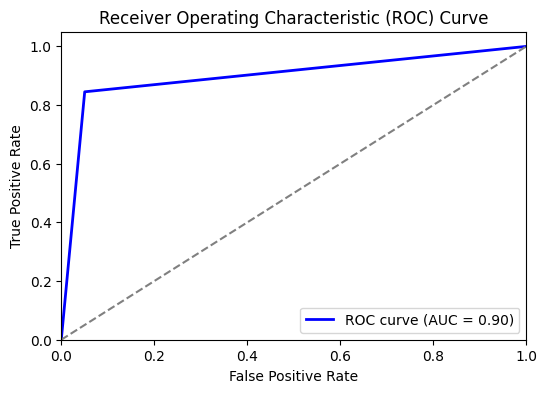

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_predict_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

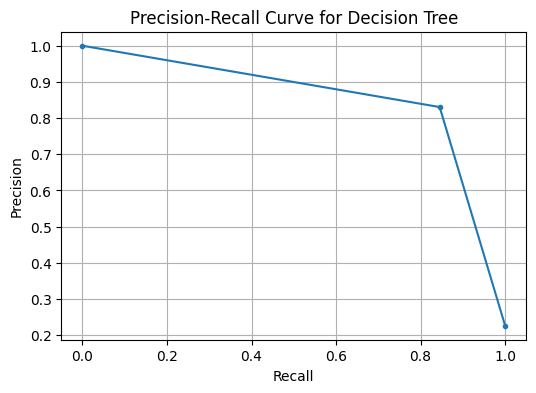

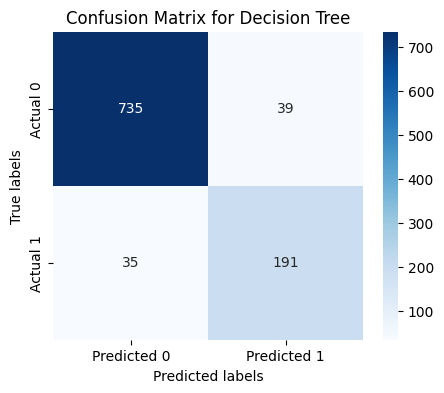

In [29]:
# Calculate precision-recall curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_predict_dt)

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall_dt, precision_dt, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.grid(True)
plt.show()

# Plot confusion matrix
conf_mat_dt = confusion_matrix(y_test, y_predict_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_dt, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [30]:
decision_tree1 =DecisionTreeClassifier().fit(X_scaled_df,y)
y_predict_dt1 = decision_tree1.predict(X_scaled_df_test)
y_predict_dt1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [31]:
# Perform cross-validation
cv_scores = cross_val_score(decision_tree1, X_scaled_df, y, cv=5)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.924 0.932 0.926 0.928 0.934]
Mean accuracy: 0.9288000000000001
Classification error: 0.07119999999999993


In [32]:
# Create a Decision Tree classifier with regularization
decision_tree_reg = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None)
decision_tree_reg.fit(X_scaled_df, y)
y_predict_dt_reg = decision_tree_reg.predict(X_scaled_df_test)
y_predict_dt_reg

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [33]:
# Perform cross-validation
cv_scores = cross_val_score(decision_tree_reg, X_scaled_df, y, cv=5)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.925 0.929 0.921 0.926 0.935]
Mean accuracy: 0.9272000000000002
Classification error: 0.07279999999999975


### Random Forest

In [34]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_predict_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_predict_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.942


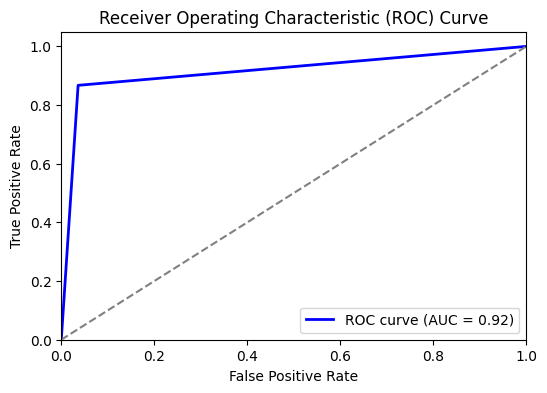

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_predict_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

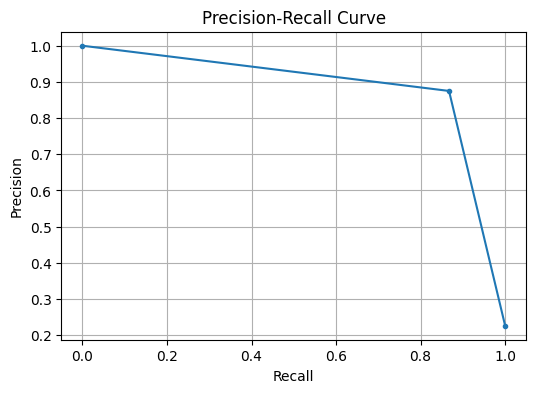

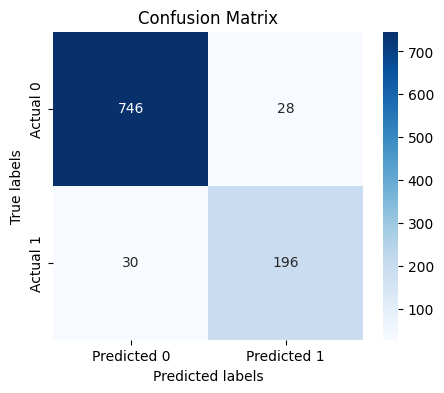

In [36]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test,y_predict_rf)

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_predict_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Create a Random Forest classifier
random_forest1 = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest1.fit(X_scaled_df, y)
y_predict_rf = random_forest1.predict(X_scaled_df_test)
y_predict_rf

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [38]:
# Perform cross-validation
cv_scores = cross_val_score(random_forest1, X_scaled_df, y, cv=5)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.944 0.95  0.936 0.952 0.946]
Mean accuracy: 0.9456
Classification error: 0.054400000000000004


In [39]:
# Create a Random Forest classifier with regularization/parameter tuning
random_forest_reg = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

# Fit the Random Forest model on the scaled training data
random_forest_reg.fit(X_scaled_df, y)

# Make predictions on the scaled test data
y_predict_rf_reg = random_forest_reg.predict(X_scaled_df_test)
y_predict_rf_reg

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [40]:
# Perform cross-validation
cv_scores = cross_val_score(random_forest_reg, X_scaled_df, y, cv=5)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.943 0.95  0.939 0.953 0.948]
Mean accuracy: 0.9465999999999999
Classification error: 0.053400000000000114


### Support Vector Classifier

In [41]:
# Create an SVC classifier
svc = SVC(kernel='rbf', C=400, gamma='auto', random_state=42)

# Fit the SVC model on the scaled training data
svc.fit(X_train, y_train)

# Make predictions on the scaled test data
y_predict_svc = svc.predict(X_test)

# Calculate accuracy for SVC
accuracy_svc = accuracy_score(y_test, y_predict_svc)

# Print the accuracy for SVC
print("SVC Accuracy:", accuracy_svc)

SVC Accuracy: 0.98


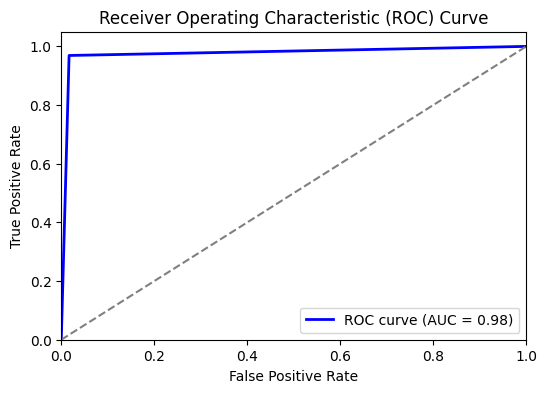

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_predict_svc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

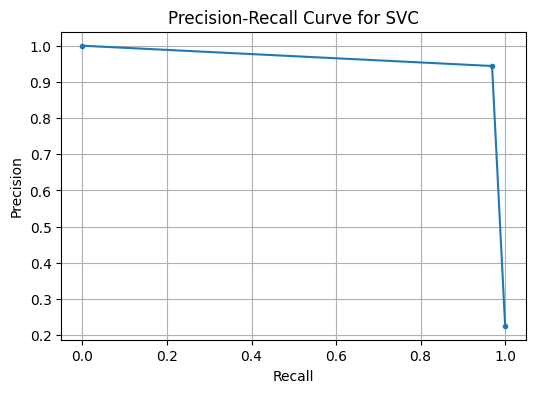

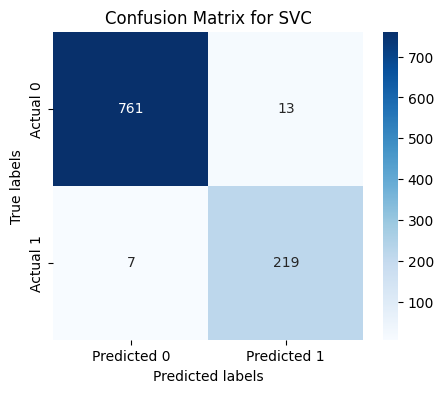

In [43]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_predict_svc)

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVC')
plt.grid(True)
plt.show()

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_predict_svc)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC')
plt.show()

In [47]:
# Create an SVC classifier
svc1 = SVC(kernel='rbf', C=400, gamma='auto', random_state=42)

# Fit the SVC model on the scaled training data
svc1.fit(X_scaled_df, y)

# Make predictions on the scaled test data
y_predict_svc = svc1.predict(X_scaled_df_test)
test_data['BS'] = y_predict_svc

# Selecting only the 'Value' and 'BS' columns
selected_columns = ['Value', 'BS']
test_data_selected = test_data[selected_columns]

In [48]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Assuming combined_df_lgb is your DataFrame and csv_file_name is the desired name of the CSV file
csv_file_name = 'group_4_prediction.csv'
csv_file_path = os.path.join('/content/drive/My Drive', csv_file_name)

# Save the DataFrame to a CSV file
test_data_selected.to_csv(csv_file_path, index=False)

print("CSV file saved to:", csv_file_path)

Mounted at /content/drive
CSV file saved to: /content/drive/My Drive/group_4_prediction.csv


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(svc1, X_scaled_df, y, cv=5)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.981 0.983 0.985 0.992 0.979]
Mean accuracy: 0.984
Classification error: 0.016000000000000014


### Gradient Boosting

In [ ]:
# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, random_state=42)

# Fit the Gradient Boosting model on the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_predict_gbc = gbc.predict(X_test)

# Calculate accuracy for Gradient Boosting
accuracy_gbc = accuracy_score(y_test, y_predict_gbc)

# Print the accuracy for Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_gbc)

Gradient Boosting Accuracy: 0.951


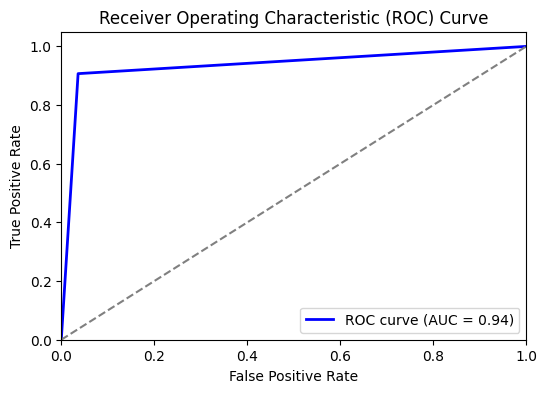

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_predict_gbc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

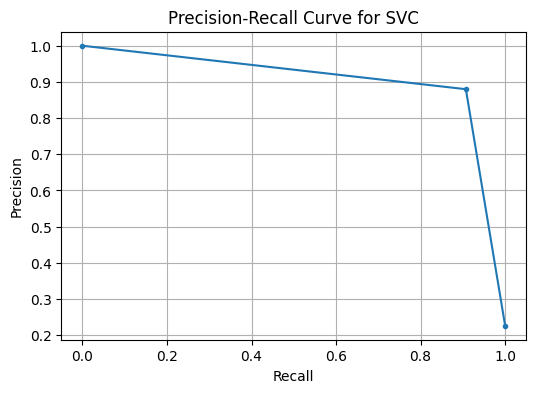

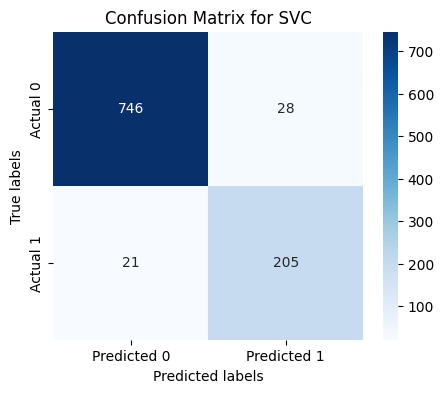

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test,y_predict_gbc)

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVC')
plt.grid(True)
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict_gbc)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC')
plt.show()

In [ ]:
# Create a Gradient Boosting classifier
gbc1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the GBC model on the scaled training data
gbc1.fit(X_scaled_df, y)

# Make predictions on the scaled test data
y_predict_gbc = gbc1.predict(X_scaled_df_test)
y_predict_gbc

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(gbc1, X_scaled_df, y, cv=5)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.935 0.922 0.938 0.941 0.929]
Mean accuracy: 0.933
Classification error: 0.06699999999999995


In [ ]:
# Create a Gradient Boosting classifier with regularization/parameter tuning
gbc_reg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.02, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the Gradient Boosting model on the scaled training data
gbc_reg.fit(X_scaled_df, y)

# Make predictions on the scaled test data
y_predict_gbc_reg = gbc_reg.predict(X_scaled_df_test)
y_predict_gbc_reg

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(gbc_reg, X_scaled_df, y, cv=5)
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

Accuracy for each fold: [0.921 0.935 0.921 0.932 0.942]
Mean accuracy: 0.9301999999999999
Classification error: 0.06980000000000008


### Neural Network

In [ ]:
# Define the optimizer with the specified learning rate
optimizer = optimizers.Adam(learning_rate=0.03)

# Define a callback to save the best model based on validation accuracy
checkpoint_callback = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=0)

# Define the neural network model with three layers
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification, adjust output layer for multi-class
])

# Compile the model with the specified optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data with the checkpoint callback
history = model.fit(X_train, y_train, epochs=85, batch_size=25, validation_data=(X_test, y_test), callbacks=[checkpoint_callback])

# Load the best model saved during training
best_model = tf.keras.models.load_model("best_model.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

# Print the accuracy for the test data
print("Test Accuracy of the Best Model:", test_accuracy)

Epoch 1/85
141/160 [=========================>....] - ETA: 0s - loss: 0.2674 - accuracy: 0.8908

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 2s 6ms/step - loss: 0.2581 - accuracy: 0.8938 - val_loss: 0.2653 - val_accuracy: 0.8910
Epoch 2/85
160/160 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9025 - val_loss: 0.3061 - val_accuracy: 0.8800
Epoch 3/85
160/160 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.8975 - val_loss: 0.2404 - val_accuracy: 0.8910
Epoch 4/85
160/160 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9070 - val_loss: 0.2083 - val_accuracy: 0.9100
Epoch 5/85
160/160 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9103 - val_loss: 0.2063 - val_accuracy: 0.9080
Epoch 6/85
160/160 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9133 - val_loss: 0.1993 - val_accuracy: 0.9080
Epoch 7/85
160/160 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9130 - val_loss: 0.2221 - val_accuracy: 0.8930
Epoch 8/85
160/16

32/32 [==============================] - 0s 1ms/step


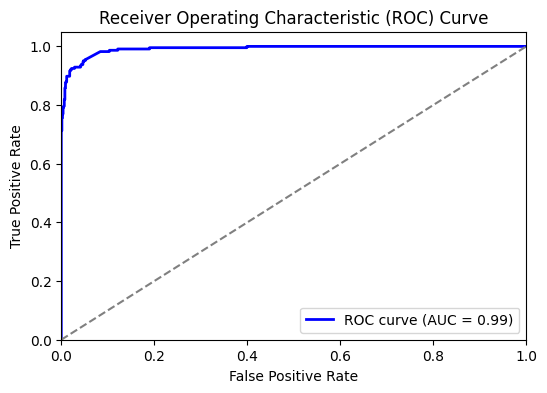

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities from the best model
y_probs = best_model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

32/32 [==============================] - 0s 1ms/step


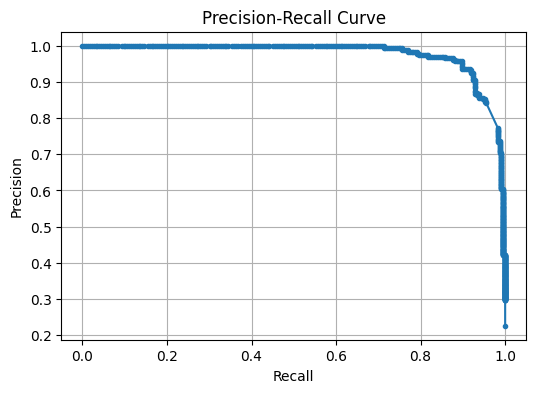

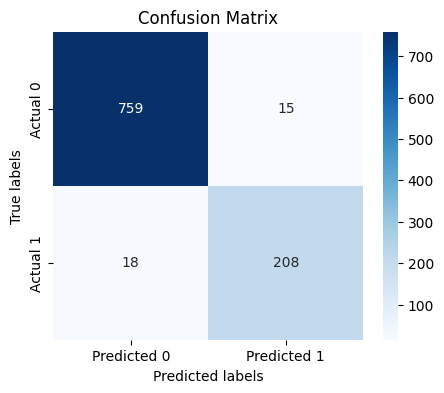

In [ ]:
# Make predictions using the best model
y_pred_proba = best_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define a callback to save the best model based on training accuracy
checkpoint_callback = ModelCheckpoint("best_model.h5", monitor='accuracy', save_best_only=True, mode='max', verbose=0)

def create_model():
    # Define the neural network model with three layers
    model = Sequential([
        Dense(100, activation='relu', input_shape=(X.shape[1],)),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification, adjust output layer for multi-class
    ])

    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizers.Adam(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

    return model


































































































































































































































































































































































































































































































































































































































































































































































































































# Create the model
model = create_model()

# Train the model on the entire data
history = model.fit(X_scaled_df, y, epochs=85, batch_size=25, callbacks=[checkpoint_callback])

# Load the best model saved during training
best_model = load_model("best_model.h5")

# Make predictions on the test data
y_predict = best_model.predict(X_scaled_df_test)

# Convert the predictions to binary labels if needed
# Assuming y_predict contains probabilities and you want to convert them to binary labels
# You may adjust the threshold based on your requirement
y_predict_binary = np.where(y_predict > 0.5, 1, 0)
y_predict_binary

NameError: name 'ModelCheckpoint' is not defined

In [ ]:







class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=10, batch_size=32, verbose=1, callbacks=None):
        self.model = model
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.callbacks = callbacks

    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, callbacks=self.callbacks)
        return self

    def predict(self, X):
        return np.round(self.model.predict(X))

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y)
        return accuracy

In [ ]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
wrapper = KerasClassifierWrapper(best_model, epochs=85, batch_size=25, verbose=0)
cv_scores = cross_val_score(wrapper, X_scaled_df, y, cv=cv, scoring='accuracy')

# Print accuracy for each fold and mean accuracy
print("Accuracy for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Calculate classification error (misclassification rate)
classification_error = 1 - cv_scores.mean()

# Print classification error
print("Classification error:", classification_error)

32/32 [==============================] - 0s 2ms/step
Accuracy for each fold: [0.975 0.979 0.976 0.953 0.975]
Mean accuracy: 0.9715999999999999
Classification error: 0.028400000000000092
